# Количесвто аптек в городе Москва

Нужно определиться, какие районы Москвы мы будем учитывать в наших результатах: Зеленоградский, Троицкий и Новомосковский районы не будут попадать в территорию нашего анализа города. Так же нужно отметить актуальность данных, данные собрал за 2022 год. (На любимом сайте с датасетами https://data.mos.ru/ не оказалось актуальных данных с аптеками.)

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.core.display import Image

In [80]:
display(Image(url='https://i.ibb.co/bNW8ZJG/image.png', width = 700))

Найдем актуальную информацию из разных источников для образования генеральной совокупности.

- https://yandex.ru/maps/: 4895
- https://2gis.ru/: 6157
- https://apteka.ru/: 4922
- https://uteka.ru/: 4912
- https://zoon.ru/: 4877
- https://moskva.apteki.su/: 6201
- https://msk.vapteke.ru/: 4904
- https://msk.spravka.city: 5001
- https://lek-info.ru/: 4798
- https://www.asna.ru/: 509
- https://aptekamos.ru/: 4844
- https://totadres.ru/: 4903
- https://yellmed.ru/apteki: 4919
- https://www.mskmed.info/: 4823
- https://cenyvaptekah.ru/: 4928
- https://www.spr.ru/: 4854
- https://pro-apteki.ru/: 4894
- http://katalogaptek.ru/: 4957
- https://zdravcity.ru/: 4931
- https://planetazdorovo.ru/: 4931
- https://003ms.ru/: 4951
- https://msk.vapteke.ru/: 4862

In [81]:
pharmacy = pd.Series([4895, 6157, 4922, 4912, 4877, 6201, 4904, 5001, 4798, 6126, 4844, 4903, 4919, 4823, 4928, 4854, 4894, 4957, 4931, 4951, 4899, 4862])
len(pharmacy)

22

Объем нашей выборки 22 элемента, это немного, но вполне хватит для этого задания. Имеем распределение Стьюдента. Строим гистграмму и диаграмму рассеяния, анализируем результаты и удаляем выбросы.

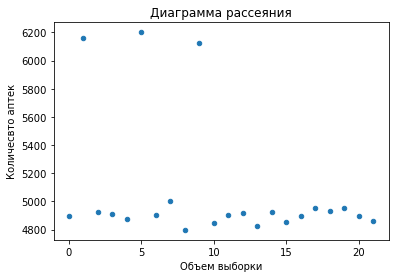

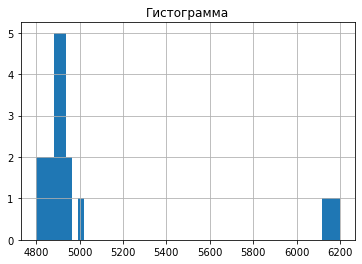

In [82]:
df = pharmacy.to_frame()
df.reset_index(inplace=True)
df.columns = ['Объем выборки','Количесвто аптек']
df.plot(kind='scatter',x='Объем выборки',y='Количесвто аптек', title="Диаграмма рассеяния")
plt.show()
pharmacy.hist(bins=50)
plt.title('Гистограмма')
plt.show()

В данных явно есть выбросы. Возможно они появились из за того, что сайты считают аптеки по области, или включают районы: Зеленоградский, Троицкий и Новомосковский (6157, 6201, 6126). Посчитаем 90-й и 99-й перцентили количества аптек в городе. Отсеим аномальные значения.

In [83]:
np.percentile(pharmacy, [90, 99])

array([6013.5 , 6191.76])

In [84]:
new_pharmacy = pharmacy.loc[pharmacy < 6013]
len(new_pharmacy)

19

В выборке мы удалили 3 значения. Построим гистограмму и боксплот генеральной совокупности. Гистограмма должна быть похожа на нормальное распределение (распределение Стьюдента, n<30) 

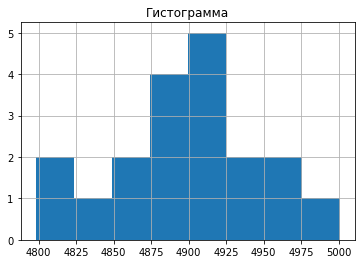

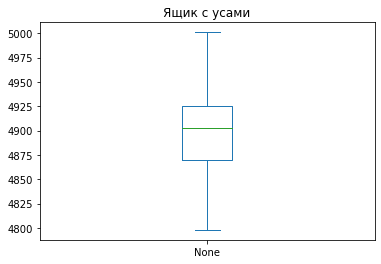

In [85]:
new_pharmacy.hist(bins=8)
plt.title('Гистограмма')
plt.show()
new_pharmacy.plot.box(title="Ящик с усами")
plt.show()

Выводим на экран основные показатели выборки, а так же стандартное отклонение и дисперсию.

In [86]:
new_pharmacy.describe()

count      19.000000
mean     4898.631579
std        48.530873
min      4798.000000
25%      4869.500000
50%      4903.000000
75%      4925.000000
max      5001.000000
dtype: float64

In [87]:
standard_deviation = round(np.std(new_pharmacy), 2)
standard_deviation

47.24

In [88]:
variance_estimate = round(np.var(new_pharmacy), 2)
variance_estimate

2231.29

Из моей небольшой аналитической работы следует:
- медианное количесвто аптек в Москве равно 4903, а среднее 4899 соответственно 
- стандартное отклонение значений 47.24